# 1. Import Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 2. Load Data

In [2]:
df = pd.read_csv("heart_super_clean.csv")
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,140,289,0,172,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
1,49,160,180,0,156,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1
2,37,130,283,0,98,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
3,48,138,214,0,108,1.5,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1
4,54,150,195,0,122,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0


# 3. Splitting The Data

In [3]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train = X_train.reset_index(drop=True)
X_test  = X_test.reset_index(drop=True)

# 4. Scaling

In [4]:
scaler = StandardScaler()
cols_to_scale = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Fit on training data and transform both train and test
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

print(" Features scaled using StandardScaler")
print("\nScaled training data (first 5 rows):")
print(X_train.head())

 Features scaled using StandardScaler

Scaled training data (first 5 rows):
        Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  Sex_M  \
0  0.970012   0.339016     0.127137          1 -0.324520  0.317046    1.0   
1  0.122028  -1.266031     0.099443          1  1.689837 -0.440356    1.0   
2  0.546020  -0.159102     1.244113          1 -0.247045  0.601071    0.0   
3 -0.725956   1.501291    -1.876035          0 -0.479470 -0.819056    1.0   
4 -0.407962   0.671094    -1.876035          1  0.101594 -0.156330    1.0   

   ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  RestingECG_Normal  \
0                1.0                0.0               0.0                0.0   
1                1.0                0.0               0.0                0.0   
2                0.0                0.0               0.0                0.0   
3                0.0                0.0               0.0                1.0   
4                0.0                0.0               0.0    

# 

# 5. Build the KNN model 

In [5]:
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

knn_classifier.fit(X_train, y_train)
print(" KNN Model trained successfully!")
print(f" Parameters: n_neighbors=5, metric='minkowski', p=2")

 KNN Model trained successfully!
 Parameters: n_neighbors=5, metric='minkowski', p=2


# 6. Predict Test Set Results 

In [6]:
y_pred_knn = knn_classifier.predict(X_test)

print("Predictions completed!")
print(f"\nFirst 10 predictions vs actual:")
comparison_df = pd.DataFrame({
    'Actual': y_test.values[:10],
    'Predicted': y_pred_knn[:10]
})
print(comparison_df)

Predictions completed!

First 10 predictions vs actual:
   Actual  Predicted
0       1          1
1       1          1
2       1          1
3       1          1
4       0          0
5       0          0
6       0          0
7       1          1
8       0          0
9       1          1


# 7. Confusion Matrix (KNN) Evaluation

In [7]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("\nConfusion Matrix:")
print(cm_knn)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"\n Accuracy: {accuracy_knn:.4f} ({accuracy_knn*100:.2f}%)")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))


Confusion Matrix:
[[68 14]
 [ 8 94]]

 Accuracy: 0.8804 (88.04%)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        82
           1       0.87      0.92      0.90       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



# 8. Visualization the Confusion Matrix

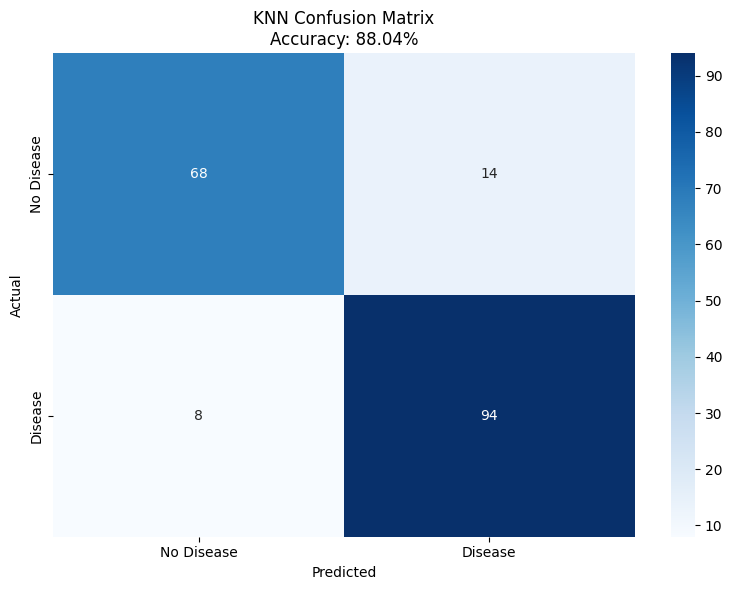

In [8]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title(f'KNN Confusion Matrix\nAccuracy: {accuracy_knn*100:.2f}%')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()